#Movimientos Caóticos Armónicos: 

#Introducción:

A lo largo de la historia los movimientos armónicos de los cuerpos han sido de gran interes para la humanidad, por esto razón los péndulos se han propuesto como uno de los mejores modelos para el estudio de este movimiento. De igual forma, las matemáticas de las ecuaciones de movimiento a este clase de movimientos han requerido la resolución de ecuaciones diferenciales de segundo orden. 

Con esto en mente el objetivo principal de este proyecto final es la solución a sus ecuaciones de movimiento y la animación de las mismas. Existen diferentes sistemas de péndulos, para este caso en particular se trabajará con  péndulo simple, péndulo doble y un sistema de N-péndulos. Con estos tres tipos de sistemas se propone la solución de las ecuaciones de movimiento por métodos númericos seguido de su respectiva animación a cada una de ellas.

#Péndulo Simple:

###Fundamentos Físicos:

El pédulo simple se define como una párticula de masa m suspendida de algún punto por un hilo, o un resorte. El péndulo simple modela los movimiento de  trayectoria oscilatoria no amortiguada o amortiguada en un intervalos de tiempo. 

Es importante tener en cuenta las caracteristicas fundamentales de un péndulo simple, tales como: 

- ***Periodo*** Se define como el tiempo que se demora el péndulo en realizar una oscilación completa. Este periodo es independiente a la amplitud. De igual manera el periodo es directamente proporcional a la raiz cuadrada de su longitud.


- ***Frecuencia*** Se define como el número de oscilaciones que se generan en un segundo.


- ***Amplitud*** Se define como la máxima distancia que existe entre la posición de equilibrio y la máxima altura


- ***Ciclo*** Un ciclo se define cmo la vibración completa del sistema que se da cuando el cuerpo parte de una posición y retorna al mismo punto.

Es posible apreciar visualmente el péndulo simple:

![Péndulo Simple](https://raw.githubusercontent.com/ArturoVelasquez/MC/master/ProyectoFinal/penduloSimple.png  "Péndulo SImple")

##Ecuación para péndulo Simple:

A través de la solución de la ecuación diferencial es posible tener una buena aproximación para péndulo simple.

$$ 
m\frac{\partial ^{2}x}{\partial t^{2}} = -kx
$$

$$
m\frac{\partial ^{2}x}{\partial t^{2}} + kx = 0
$$

Su polinomio asociado es:

$$
m r^{2} + k = 0
$$

Siendo:

$$
r^{2} = \frac{-k}{m}
$$

Con Raices:

$$
r = \pm \sqrt{\frac{-k}{m}}
$$

Solución: 

$$
x_{1} = e ^{+\frac{i k}{m}}
$$

$$
x_{2} = e ^{-\frac{i k}{m}}
$$

$$
x_{t} = C_{1} e ^{+\frac{i k}{m}} + C_{2} e ^{-\frac{i k}{m}}
$$

In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import scipy as sp
import sympy as sy
import matplotlib.pyplot as plt
from scipy import integrate

Populating the interactive namespace from numpy and matplotlib


##Ecuación para péndulo Simple:
$$
\frac{d^{2}x}{dt^{2}} = -\frac{k}{m} x
$$

In [2]:
#Método para el pédulo simple, partiendo de la solución a la ecuación diferencial
def penduloSimple(apertura,frecuencia,desface,duracion):
    A=apertura
    w=frecuencia
    d=desface
    tmax=duracion
    momentos = 100
    
    instantes = np.linspace(0,tmax,momentos)
    posicion = np.zeros(momentos)
    
    for i in range(momentos):
        posicion[i]=A*np.sin(w*i+d)
    plt.figure(figsize=(10,10))
    plt.plot(instantes,posicion,'--', color='teal')
    plt.title(r"""$Posiciones\,p\'endulo\,simple$""", fontsize=30)
    plt.xlabel(r"""$Tiempo$""", fontsize=20)
    plt.ylabel(r"""$Posici\'on$""", fontsize=20)
    plt.show

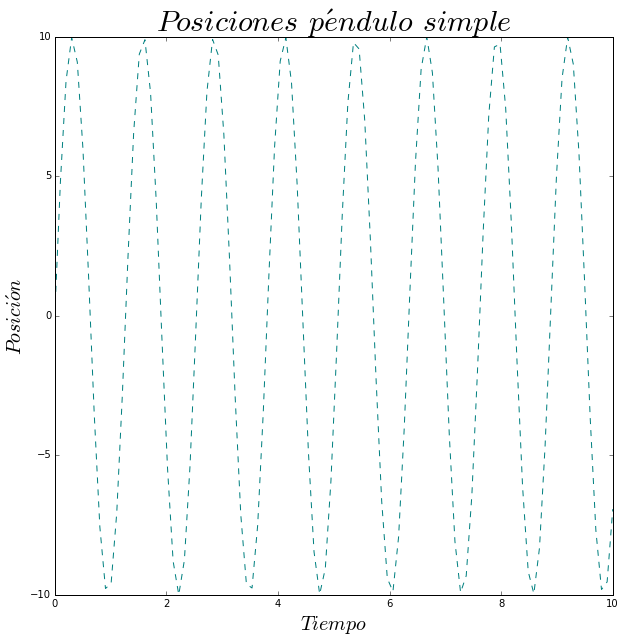

In [3]:
penduloSimple(10,0.5,0,10)

In [4]:
def penduloSimpleAnimable(apertura,frecuencia,desface,duracion):
    A=apertura
    w=frecuencia
    d=desface
    tmax=duracion
    momentos = 1000
    
    instantes = np.linspace(0,tmax,momentos)
    posicion = np.zeros(momentos)
    quieto = np.zeros(momentos)
    
    
    for i in range(momentos):
        posicion[i]=A*np.sin(w*i+d)
        
    for i in range(momentos):
        plt.figure(figsize=(10,10))
        plt.plot(posicion[i],quieto[i],'bo', color='teal')
        plt.title(r"""$Posiciones\,p\'endulo\,simple$""", fontsize=30)
        plt.xlabel(r"""$Posiciones$""", fontsize=20)
        plt.xlim(-10,10)
        plt.ylim(-10,10)
        plt.savefig(str(i))

Animacion Disponible en: [Link En Git](https://github.com/ArturoVelasquez/MC/blob/master/ProyectoFinal/PenduloSimple.gif)

##Aproximación para péndulo simple por Lagrange:

$$
L = T - U
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) - \left ( \frac{\partial L}{\partial \ r } \right ) = 0
$$

- **Poisición Inicial:**

$$
x = l_{1} sen(\Theta _{1})
$$

$$
y = - l_{1} cos(\Theta _{1}) 
$$

- **Velocidades:**

$$
\frac{\partial x}{ \partial t} = l_{1} cos(\Theta _{1}) \dot{\Theta _{1}}
$$

$$
\frac{\partial y}{ \partial t} = l_{1} sen(\Theta _{1}) \dot{\Theta _{1}}
$$

Entonces el Lagrangiano queda:

- **Energía Cinética:**

$$
T = \frac{1}{2} m_{1}\left (  l_{1}^{2} \dot{\Theta _{1}}^{2}\right )
$$


- **Energía Potencial:**

$$
U =  - m_{1} g l_{1} cos(\Theta _{1}) 
$$

- **Lagrange:**

$$
L =\frac{1}{2} m_{1}\left (  l_{1}^{2} \dot{\Theta _{1}}^{2} \right ) +  m_{1} g l_{1} cos(\Theta _{1}) 
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) = m_{1} l_{1}^{2} \ddot{\Theta _{1}} 
$$

$$
\left ( \frac{\partial L}{\partial \ r } \right ) = -  m_{1} g l_{1} sen(\Theta _{1})
$$

$$
m_{1} l_{1}^{2} \ddot{\Theta _{1}} + m_{1} g l_{1} sen(\Theta _{1})
$$

###Aplicaciones:

Los sistemas de péndulos son muy útiles en la vida cotidiana, como por ejemplo:

- **Medición del tiempo:** Los muy antiguos relojes de péndulo, que permitieron durante mucho tiempo establecer una medida aproximada del tiempo

- **Plomada:** Intrumento que marca una línea vertical en cualquier superficie, con esta marcación se puede hacer una guia. La plomada es una masa usualmente metálica amarrada a una cuerda.

- **Péndulo de Foucault:** Este péndulo evidencia la rotación de la tierra, pues este péndulo gigante cambia en direccion a la rotación de la tierra, como un péndulo oscila en un plano fijo. Recibe este nombre en honor al físico francés León Foucault. 

#Péndulo Doble:

###Fundamentos Físicos:

El péndulo doble se define como un sistema compuesto por dos péndulos, en donde el péndulo número uno esta colgado del péndulo números dos. 
También es posible apeciarlos como dos péndulos simples pero esta vez uno de los péndulos suspendido de la masa del otro péndulo.

Es posible apreciar visualmente el péndulo doble:
![Péndulo Doble](https://raw.githubusercontent.com/ArturoVelasquez/MC/master/ProyectoFinal/pendulo_doble.png "Péndulo Doble")

##Ecuación para péndulo Doble:
###Aproximación para Doble por Lagrange:

$$
L = T - U
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) - \left ( \frac{\partial L}{\partial \ r } \right ) = 0
$$
 
- **Poisición Inicial:**

$$
x_{1} = l_{1} sen(\Theta _{1})
$$

$$
y_{1} = - l_{1} cos(\Theta _{1}) 
$$

$$
x_{2} = l_{1} sen(\Theta _{1}) + l_{2} sen(\Theta _{2})
$$

$$
y_{2} = - l_{1} cos(\Theta _{1}) - l_{2} cos(\Theta _{2}) 
$$


- **Velocidades:**

$$
\frac{\partial x_{1}}{ \partial t} = l_{1} cos(\Theta _{1}) \dot{\Theta _{1}}
$$

$$
\frac{\partial y_{1}}{ \partial t} = l_{1} sen(\Theta _{1}) \dot{\Theta _{1}}
$$

$$
\frac{\partial x_{2}}{ \partial t} = l_{1} cos(\Theta _{1}) \dot{\Theta _{1}} + l_{2} cos(\Theta _{2}) \dot{\Theta _{2}}
$$

$$
\frac{\partial y_{2}}{ \partial t} = l_{1} sen(\Theta _{1}) \dot{\Theta _{1}} + l_{2} cos(\Theta _{2}) \dot{\Theta _{2}}
$$

Entonces el Lagrangiano queda:

- **Energía Cinética:**

$$
T = \frac{1}{2} m_{1} l_{1}^{2} \dot{\Theta _{1}}^{2} + \frac{1}{2} m_{2} l_{1}^{2} \dot{\Theta _{2}}^{2} + m_{2} l_{1} l_{2} \dot{\Theta _{1}} \dot{\Theta _{2}} cos (\Theta _{1} - \Theta _{2})
$$


- **Energía Potencial:**

$$
U =  - m_{1} g l_{1} cos(\Theta _{1}) + m_{2} g (-l_{1} cos(\Theta _{1}) - l_{2} cos(\Theta _{2}) )
$$

- **Lagrange:**

$$ 
(m_{1} + m_{2}) l_{1}^{2} \ddot{\Theta _{1}} + m_{2} l_{1} l_{2} \ddot{\Theta _{2}} - m_{2} l_{1} l_{2} \dot{\Theta _{2}} sen (\Theta _{1} - \Theta _{2}) (\dot{\Theta _{1}} - \dot{\Theta _{2}}) - m_{2} l_{1} l_{2} \dot{\Theta _{1}} \dot{\Theta _{2}} sen (\Theta _{1} - \Theta _{2}) - (m_{1} + m_{2}) g l_{1} sen (\Theta _{1})
$$

$$
m_{2} l_{2} \ddot{\Theta _{2}} + m_{2} l_{1} l_{2} \dot{\Theta _{1}} cos (\Theta _{1} - \Theta _{2}) -  m_{2} l_{1} l_{2} \dot{\Theta _{1}} sen (\Theta _{1} - \Theta _{2}) (\dot{\Theta _{1}} - \dot{\Theta _{2}}) -  m_{2} l_{1} l_{2} \dot{\Theta _{1}} \dot{\Theta _{2}} cos (\Theta _{1} - \Theta _{2}) + l_{2} m_{2} g sen(\Theta _{2})
$$

In [2]:
from scipy.integrate import odeint
from scipy.integrate import ode
from numpy import sin, cos, pi, array
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate


# Primer Intento

In [3]:
m1=1
m2=1
l1=1
l2=1
tet1=np.pi
tet2=0
tmax=100
times=np.linspace(0,tmax,1000)
def function(w,t):
    g=9.8
    delta_a=tet1-tet2
    angulo1=(1/(m1+m2))*(-np.cos(delta_a)*(l2/l1)*(-(l1/l2)*w[1]*np.cos(delta_a)
                                                   +(l1/l2)*w[0]**2*np.sin(delta_a)
                                                   -(g/l2)*np.sin(tet2))+(m2*(l2/l1)*np.sin(delta_a))
                        -(m1+m2)*(g/l1)*np.sin(tet1))
    angulo2=-(l1/l2)*w[1]*np.cos(delta_a)+(l1/l2)*w[0]**2*np.sin(delta_a)-(g/l2)*np.sin(tet2)
    return np.array(angulo1,angulo2)
    

In [4]:
resultado,data=odeint(function,[0.,0.],times,full_output=True,printmessg=True)
print resultado

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
[[  0.00000000e+000   0.00000000e+000]
 [  0.00000000e+000   1.13141033e-318]
 [  4.94065646e-324   2.18658159e-316]
 ..., 
 [  6.79038654e-313   2.14321575e-312]
 [  2.20687562e-312   6.79038653e-313]
 [  6.79038653e-313   6.79038653e-313]]


In [5]:

y1=np.cos(resultado[:,0])
x1=np.sin(resultado[:,0])
y2=np.cos(resultado[:,1])
x2=np.sin(resultado[:,1])



def anima():
    xp=0
    yp=0
    for i in range(len(x1)):
        xp=(x1[i]+x2[i])
        yp=(y1[i]+y2[i])
        plt.plot(xp,yp,'bo')
        plt.show
anima()

#Segundo intento

In [9]:
# Implementado de el codigo de ejemplos de matplotlib
# http://matplotlib.org/examples/animation/double_pendulum_animated.html

g =  9.8 # Aceleración gravitacional en sistema intenaional
l1,l2 = 1.,1. # Longitud equivalente a un metro para ambos pendulos
m1,m2 = 1.,1. # Masa de un kilogramo pra ambos pendulos

def Pendulos_runge_kutta(estado, t):

    dydx = np.zeros_like(estado)
    dydx[0] = estado[1]

    delta_tetha = estado[2]-estado[0]
    den1 = (m1+m2)*l1 - m2*l1*cos(delta_tetha)*cos(delta_tetha)
    dydx[1] = (m2*l1*estado[1]*estado[1]*sin(delta_tetha)*cos(delta_tetha)
               + m2*g*sin(estado[2])*cos(delta_tetha) + m2*l2*estado[3]*estado[3]*sin(delta_tetha)
               - (m1+m2)*g*sin(estado[0]))/den1

    dydx[2] = estado[3]

    den2 = (l2/l1)*den1
    dydx[3] = (-m2*l2*estado[3]*estado[3]*sin(delta_tetha)*cos(delta_tetha)
               + (m1+m2)*g*sin(estado[0])*cos(delta_tetha)
               - (m1+m2)*l1*estado[1]*estado[1]*sin(delta_tetha)
               - (m1+m2)*g*sin(estado[2]))/den2

    return dydx

# Se crea un arreglo para el tiempo de 0 a 20 con 100 pasos
dt = 0.05
t = np.arange(0.0, 20, dt)

# Se dan los angulos y velocidades angulares inciales 
ang1 = 120.0
w1 = 0.0
ang2 = -10.0
w2 = 0.0

rad = pi/180

# estado inicial
estado = np.array([ang1, w1, ang2, w2])*pi/180.

# Se integra usando ODE de scipy.integrate.
y = integrate.odeint(Pendulos_runge_kutta, estado, t)

x1 = l1*sin(y[:,0])
y1 = -l1*cos(y[:,0])

x2 = l2*sin(y[:,2]) + x1
y2 = -l2*cos(y[:,2]) + y1



numGraficas=len(x1)

for i in range(numGraficas):
        plt.figure(figsize=(10,10))
        plt.grid()
        plt.plot(x1[i],y1[i],'bo', color='teal')
        plt.plot(x2[i],y2[i],'bo', color='lightgreen')
        plt.title(r"""$Posiciones\,p\'endulo\,doble$""", fontsize=30)
        plt.xlabel(r"""$Posiciones$""", fontsize=20)
        plt.xlim(-5,5)
        plt.ylim(-5,5)
        plt.savefig(str(i)) 


Animación disponible en: [Link GitHub](https://raw.githubusercontent.com/ArturoVelasquez/MC/master/ProyectoFinal/PenduloDoble.gif)

Las animaciones se producen a través del script en Bash, creado por nuestro compañero Diego Ramirez

#Sistema de N-Péndulos:

###Fundamentos Físicos:

El péndulo de N masas es la generalizacion de un sistema, oscilatorio de dos cuerpos. La generalizacion hacia un modelo continuo deriva en modelos como las ecucioanes de onda. El proposito planteado es generar movimientos caiticos, sin tener en cuentra efectos de amortiguamiento y graficarlos. Estos deberia generalizarse a un movimiento, parecido al de una cuerda cuando el numero de masas tienda a infinito. 

###Solución Método Matemático:

A través de Runge-Kutta y junto con las ecuaciones desacopladas es posible realizar una aproximacion de el movimiento caotico, y resolver la ecuacion diferencia que se obtiene del lagrangiano para un sistema dependulos con N masas. Estas ecuaciones estan acopladas y forman un sistema de acuaciones diferenciales con una solucion analitica muy complicada y que ees posible no se pueda resolver. Todo esto partiendo de que existe una simetria en el acoplamiento de las masas.

##Ecuación para N-péndulos:
###Aproximación para Doble por Lagrange:

$$
L = T - U
$$

$$
\frac{d}{dt}\left ( \frac{\partial L}{\partial \dot{r}} \right ) - \left ( \frac{\partial L}{\partial \ r } \right ) = 0
$$
 
- **Poisición Inicial:**

$$
x_{n-1} = l_{n-1} sen(\Theta _{n-1})
$$

$$
y_{n-1} = - l_{n-1} cos(\Theta _{n-1}) 
$$

$$
x_{n} = l_{n-1} sen(\Theta _{n-1}) + l_{n} sen(\Theta _{n})
$$

$$
y_{n} = - l_{n-1} cos(\Theta _{n-1}) - l_{n} cos(\Theta _{n}) 
$$

$$
x_{n+1} = l_{n-1} sen(\Theta _{n-1}) + l_{n} sen(\Theta _{n}) + l_{n + 1} sen(\Theta _{n +1})
$$

$$
y_{n+1} = - l_{n-1} cos(\Theta _{n-1}) - l_{n} cos(\Theta _{n}) - l_{n + 1} cos(\Theta _{n + 1})
$$


- **Velocidades:**

$$
\frac{\partial x_{n-1}}{ \partial t} = l_{n-1} cos(\Theta _{n-1}) \dot{\Theta _{n-1}}
$$

$$
\frac{\partial y_{n-1}}{ \partial t} = l_{n-1} sen(\Theta _{n-1}) \dot{\Theta _{n-1}}
$$

$$
\frac{\partial x_{n}}{ \partial t} = l_{n-1} cos(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{n} cos(\Theta _{n}) \dot{\Theta _{n}}
$$

$$
\frac{\partial y_{n}}{ \partial t} = l_{n-1} sen(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{2} cos(\Theta _{n}) \dot{\Theta _{n}}
$$

$$
\frac{\partial x_{n+1}}{ \partial t} = l_{n-1} cos(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{n} cos(\Theta _{n}) \dot{\Theta _{n}} + l_{n+1} cos(\Theta _{n+1}) \dot{\Theta _{n+1}}
$$

$$
\frac{\partial y_{n+1}}{ \partial t} = l_{n-1} sen(\Theta _{n-1}) \dot{\Theta _{n-1}} + l_{2} cos(\Theta _{n}) \dot{\Theta _{n}} + l_{n+1} sen(\Theta _{n+1}) \dot{\Theta _{n+1}} 
$$

Entonces el Lagrangiano queda:

- **Energía Cinética:**

$$
T = \frac{1}{2} m_{n-1}  l_{n-1}^{2} \dot{\Theta _{n-1}}^{_{2}} + \frac{1}{2} m_{n} l_{n-1}^{2} \dot{\Theta _{n-1}}^{_{2}} +  m_{n} l_{n-1} \dot{\Theta _{n-1}} l_{n} \dot{\Theta _{n} }  cos(\Theta _{n-1} - \Theta _{n}) + \frac{1}{2} m_{n} l_{n} \dot{\Theta _{n}}^{2} + frac{1}{2} m_{n+1} l_{n} \dot{\Theta _{n}}^{2} + frac{1}{2} m_{n+1} l_{n+1} \dot{\Theta _{n+1}}^{2} + m_{n+1} l_{n-1} \dot{\Theta _{n-1}} l_{n} \dot{\Theta _{n} }  cos(\Theta _{n-1} - \Theta _{n}) + m_{n+1} l_{n-1} \dot{\Theta _{n-1}} l_{n+1} \dot{\Theta _{n+1} }  cos(\Theta _{n-1} - \Theta _{n+1}) + m_{n +1} l_{n} \dot{\Theta _{n}} l_{n+1} \dot{\Theta _{n+1} }  cos(\Theta _{n} - \Theta _{n+1})  
$$

- **Energía Potencial:**

$$
- l_{n-1}gcos(\Theta _{n-1})( m_{n-1} + m_{n} + m_{n+1} ) - l_{n}gcos(\Theta _{n})( m_{n} + m_{n+1}) - l_{n+1}gcos(\Theta _{n+1})( m_{n+1} )
$$

#Conclusiones:

- Para el péndulo simple, la implementación del código a la solución a la ecuación diferencial fue exitosa. Este método permite conocer la función para hallar la solución a la ecuación de primer orden. Para resolver la ecuación diferencial al péndulo simple, se usaron conociminetos previos de la clase de Ecuaciones Diferenciales, y con el proceso del polinomio asociado se llego a la solucion de las mismas.  Entonces partiendo desde la solución a la ecuación diferencial de primer orden se traduce a lenguaje de promación (Python) y luego se obtiene la gráfica y la animación correspondiente. El resultado dado para este péndulo simple es el esperado, al igual que la animación.

- Para el péndulo doble, se realizaron varios cálculos tales como las ecuaciones de movimiento a través del método de Lagrange, pero estas ecuaciones resultan dar ecuaciones acopladas difíciles de implementar en algún método númerico, por esta razón se modifican las ecuaciones haciendolas desacopladas entre ellas e implementando un nuevo método con la ayuda de los  métodos de Runge-Kutta Orden 4 y de OdeInt. El resultado dado para el péndulo doble es el esperado, al igual que la animación.

- Para el sistema de N-Péndulos se generaliza las ecuaciones de movimientos obtenidas con el método de Lagrange. Al igual se generalizan las ecuaciones por el Hammiltoniano. Sin embargo las ecuaciones resultantes de ambos métodos son acopladas entre ellas y para el caso generalizado el desacoplamiento de estas ecuaciones no es sencillo de traducir a lenguaje de programación (Python). En el intento de desacoplar las ecuaciones se encontraron dos métodos que resultan ayudar a este problema, estos métodos no pertencen al temario que se visto en clase, como lo es el método de Verlet. Adjunto link de donde se inspiro la idea: [Método De Verlet](http://www.scielo.org.mx/pdf/rmfe/v60n1/v60n1a5.pdf). De igual forma el método de Euler, en el que se permite bajar el grado de la ecuación acoplada, con unas diferencias al método que si se vio en clase para la resolución de ecuaciones diferenciales. Adjunto link de donde se inspiro la idea: [Método de Euler](https://fisicompufciencias.files.wordpress.com/2009/09/edos.pdf)

#Bibliografía:

- Ryan, H. L. (2014) *Ordinary Differencial Equations* USA:Springer

- Aslak T, L. F. (2010) *Elements of Scientific COmputing* Vol 7, Springer

-  PENDULO DOBLE, Math.tamu, [en linea] Recuperada: 20 Julio 2015 Disponible en:  http://www.math.tamu.edu/~mpilant/math308/Matlab/Project3/Project3.pdf

- Proyecto Physthones ,Corzo Garcia Pablo, [en linea] Recuperado: 20 Julio 2015 Disponible en: http://www.academia.edu/547377/Proyecto_Physthones_simulaciones_f%C3%ADsicas_en_Visual_Python

- Animación Péndulo, MatPlotLib, [en linea] Recuperado: 21 Julio 2015 Disponible en: http://matplotlib.org/examples/animation/double_pendulum_animated.html

- Modelación de un sistema oscilante caótico empleando programas libres de Sistemas de Álgebra Computacional, Pallares M. [en linea] Recuperado: 19 Julio 2015 Disponible en: http://www.iiis.org/CDs2010/CD2010CSC/CISCI_2010/PapersPdf/CA897GU.pdf

- Mecánica 3d: python y el algoritmo de Verlet, Rojas. C, [en linea] Recuperado: 20 Julio 2015 Disponible en: http://www.scielo.org.mx/pdf/rmfe/v60n1/v60n1a5.pdf

- Péndulos, Capítulo 6, [en linea] Recuperado 20 Julio 2015 Disponible en: http://tesis.uson.mx/digital/tesis/docs/20985/Capitulo6.pdf

- Runge Kutta Algorithm, MyPhysccsLab.com [en linea] Recuperado: 19 Julio 2015 Disponible en: http://www.myphysicslab.com/runge_kutta.html